# Algorithm Evaluation

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 : Data ingestion

In [3]:
import pandas as pd
df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


#### Target = loan_status

### Step 2 : Basic data quality checks


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3 : Saperate X and Y(loan_status)

In [10]:
X = df.drop(columns=["id", "loan_status"])
Y = df[["loan_status"]]

In [11]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [12]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


### Step 4 : Apply preprocessing on X

In [13]:
X.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [14]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [15]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [16]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [19]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [20]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [21]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 5 : train_test_split

In [22]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [23]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [26]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


### Step 6 : Algorithm Evaluation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [29]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]


In [32]:
type(models[0]).__name__

'LogisticRegression'

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [34]:
def evaluate_single_model(model, xtrain, ytrain, xtest, ytest):
    # Fit the model on train data
    model.fit(xtrain, ytrain)

    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Calculate f1_macro for train and test
    f1_train = f1_score(ytrain, ypred_train, average="macro")
    f1_test = f1_score(ytest, ypred_test, average="macro")

    # Get 5 fold cross validated score on train data
    scores = cross_val_score(model, xtrain, ytrain, scoring="f1_macro", cv=5, n_jobs=-1)
    f1_cv = scores.mean()

    # Store above results in dictionary
    r = {
        "name" : type(model).__name__,
        "model" : model,
        "f1_train" : f1_train,
        "f1_test" : f1_test,
        "f1_cv" : f1_cv
    }

    # return the results dictionary
    return r

In [37]:
for i in models:
    r = evaluate_single_model(i, xtrain, ytrain, xtest, ytest)
    print(r)

{'name': 'LogisticRegression', 'model': LogisticRegression(), 'f1_train': 0.7932097686790878, 'f1_test': 0.7866093094551303, 'f1_cv': np.float64(0.792751366871291)}
{'name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'f1_train': 1.0, 'f1_test': 0.8917302089838604, 'f1_cv': np.float64(0.8849329036283808)}
{'name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1_train': 1.0, 'f1_test': 0.8206795138386626, 'f1_cv': np.float64(0.8246923486490626)}
{'name': 'GradientBoostingClassifier', 'model': GradientBoostingClassifier(), 'f1_train': 0.8781526079850772, 'f1_test': 0.8754022692255916, 'f1_cv': np.float64(0.8765441456947902)}
{'name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=No

In [40]:
def evaluate_all_models(model, xtrain, ytrain, xtest, ytest):
    # Initialize a results list
    res = []

    # Evaluate all models
    for model in models:
        r = evaluate_single_model(model, xtrain, ytrain, xtest, ytest)
        print(r)
        res.append(r)

    # Convert the res to dataframe
    res_df = pd.DataFrame(res)

    # Sort the values by f1_cv
    res_df = res_df.sort_values(by="f1_cv", ascending=False).reset_index(drop=True)

    # Choose the best model
    best_model = res_df.loc[0, "model"]

    # Return best model and res_df
    return res_df, best_model

In [41]:
models

[LogisticRegression(),
 RandomForestClassifier(),
 DecisionTreeClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

In [42]:
res_df, best_model = evaluate_all_models(models, xtrain.values, ytrain.values, xtest.values, ytest.values)

{'name': 'LogisticRegression', 'model': LogisticRegression(), 'f1_train': 0.7932097686790878, 'f1_test': 0.7866093094551303, 'f1_cv': np.float64(0.792751366871291)}
{'name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'f1_train': 0.9999565106984205, 'f1_test': 0.8887495270958015, 'f1_cv': np.float64(0.8849834205588436)}
{'name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1_train': 1.0, 'f1_test': 0.8176243741207071, 'f1_cv': np.float64(0.8263669174891206)}
{'name': 'GradientBoostingClassifier', 'model': GradientBoostingClassifier(), 'f1_train': 0.8781526079850772, 'f1_test': 0.8754022692255916, 'f1_cv': np.float64(0.8765441456947902)}
{'name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
       

In [43]:
res_df

,name,model,f1_train,f1_test,f1_cv
0,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.925689,0.893045,0.889798
1,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.999957,0.888750,0.884983
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.878153,0.875402,0.876544
3,DecisionTreeClassifier,DecisionTreeClassifier(),1.000000,0.817624,0.826367
4,LogisticRegression,LogisticRegression(),0.793210,0.786609,0.792751


In [44]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Step 7  : Best model evaluation

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

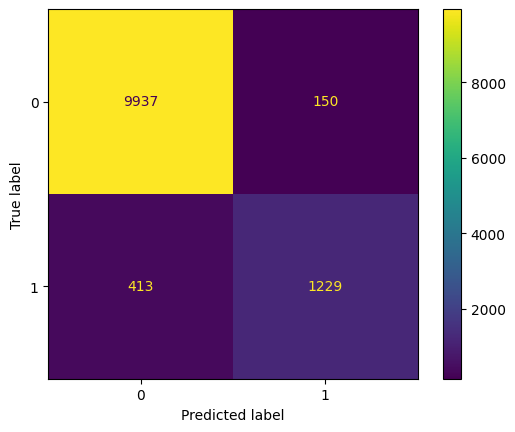

In [46]:
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [47]:
ypred_test = best_model.predict(xtest)

In [48]:
ypred_test[0:5]

array([0, 0, 1, 0, 0])

In [49]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [51]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.89      0.75      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.87      0.89     11729
weighted avg       0.95      0.95      0.95     11729



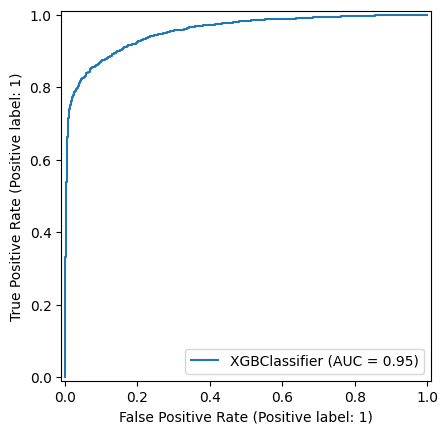

In [52]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [53]:
scores_acc = cross_val_score(best_model, xtrain, ytrain, scoring="roc_auc", cv=5, n_jobs=-1)
scores_acc

array([0.95308007, 0.94664746, 0.95617434, 0.9549418 , 0.94643417])

In [54]:
scores_acc.mean()

np.float64(0.9514555687609704)

In [55]:
best_model.feature_importances_

array([0.00844115, 0.02314099, 0.01714167, 0.00776143, 0.03951892,
       0.09599598, 0.00676702, 0.00746508, 0.05426886, 0.14370023,
       0.02802723, 0.03907194, 0.05284417, 0.02626234, 0.0318043 ,
       0.00826063, 0.03997492, 0.341301  , 0.01749194, 0.00321778,
       0.00109299, 0.00644946], dtype=float32)

In [56]:
xtrain.columns

Index(['num__person_age', 'num__person_income', 'num__person_emp_length',
       'num__loan_amnt', 'num__loan_int_rate', 'num__loan_percent_income',
       'num__cb_person_cred_hist_length', 'cat__person_home_ownership_OTHER',
       'cat__person_home_ownership_OWN', 'cat__person_home_ownership_RENT',
       'cat__loan_intent_EDUCATION', 'cat__loan_intent_HOMEIMPROVEMENT',
       'cat__loan_intent_MEDICAL', 'cat__loan_intent_PERSONAL',
       'cat__loan_intent_VENTURE', 'cat__loan_grade_B', 'cat__loan_grade_C',
       'cat__loan_grade_D', 'cat__loan_grade_E', 'cat__loan_grade_F',
       'cat__loan_grade_G', 'cat__cb_person_default_on_file_Y'],
      dtype='object')

In [58]:
imp = pd.Series(best_model.feature_importances_, index=xtrain.columns)
imp

num__person_age                     0.008441
num__person_income                  0.023141
num__person_emp_length              0.017142
num__loan_amnt                      0.007761
num__loan_int_rate                  0.039519
num__loan_percent_income            0.095996
num__cb_person_cred_hist_length     0.006767
cat__person_home_ownership_OTHER    0.007465
cat__person_home_ownership_OWN      0.054269
cat__person_home_ownership_RENT     0.143700
cat__loan_intent_EDUCATION          0.028027
cat__loan_intent_HOMEIMPROVEMENT    0.039072
cat__loan_intent_MEDICAL            0.052844
cat__loan_intent_PERSONAL           0.026262
cat__loan_intent_VENTURE            0.031804
cat__loan_grade_B                   0.008261
cat__loan_grade_C                   0.039975
cat__loan_grade_D                   0.341301
cat__loan_grade_E                   0.017492
cat__loan_grade_F                   0.003218
cat__loan_grade_G                   0.001093
cat__cb_person_default_on_file_Y    0.006449
dtype: flo

In [59]:
imp.sort_values()

cat__loan_grade_G                   0.001093
cat__loan_grade_F                   0.003218
cat__cb_person_default_on_file_Y    0.006449
num__cb_person_cred_hist_length     0.006767
cat__person_home_ownership_OTHER    0.007465
num__loan_amnt                      0.007761
cat__loan_grade_B                   0.008261
num__person_age                     0.008441
num__person_emp_length              0.017142
cat__loan_grade_E                   0.017492
num__person_income                  0.023141
cat__loan_intent_PERSONAL           0.026262
cat__loan_intent_EDUCATION          0.028027
cat__loan_intent_VENTURE            0.031804
cat__loan_intent_HOMEIMPROVEMENT    0.039072
num__loan_int_rate                  0.039519
cat__loan_grade_C                   0.039975
cat__loan_intent_MEDICAL            0.052844
cat__person_home_ownership_OWN      0.054269
num__loan_percent_income            0.095996
cat__person_home_ownership_RENT     0.143700
cat__loan_grade_D                   0.341301
dtype: flo

<Axes: >

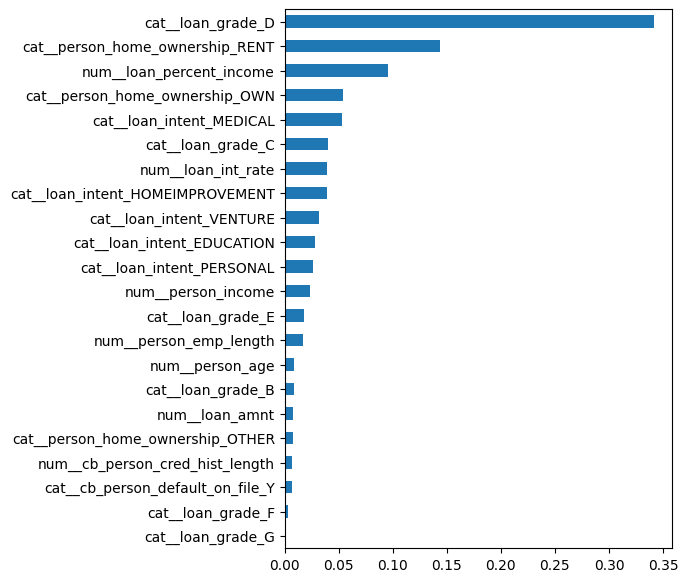

In [63]:
imp.sort_values().plot(kind="barh", figsize=(5,7))

<Axes: >

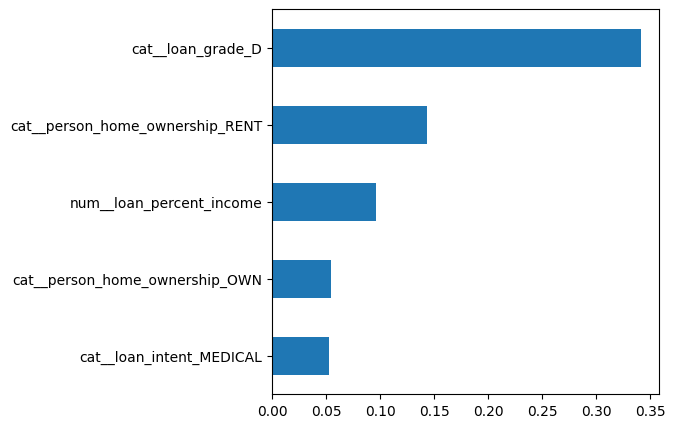

In [64]:
imp.sort_values().tail().plot(kind="barh", figsize=(5,5))

### Out of sample prediction

In [65]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [66]:
xnew.shape

(39098, 12)

In [67]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [68]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [69]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([1, 0, 0, 0, 0])

In [71]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.99767345, 0.0155152 , 0.44624576, 0.00608364, 0.01961199],
      dtype=float32)

In [76]:
res = xnew[["id"]]
res

,id
0,58645
1,58646
2,58647
3,58648
4,58649
...,...
39093,97738
39094,97739
39095,97740
39096,97741


In [77]:
res["loan_status"] = preds
res["probs"] = probs

In [78]:
res = res.round(4)

In [79]:
res

,id,loan_status,probs
0,58645,1,0.9977
1,58646,0,0.0155
2,58647,0,0.4462
3,58648,0,0.0061
4,58649,0,0.0196
...,...,...,...
39093,97738,0,0.0281
39094,97739,0,0.0023
39095,97740,0,0.0065
39096,97741,0,0.0808


<Axes: xlabel='loan_status'>

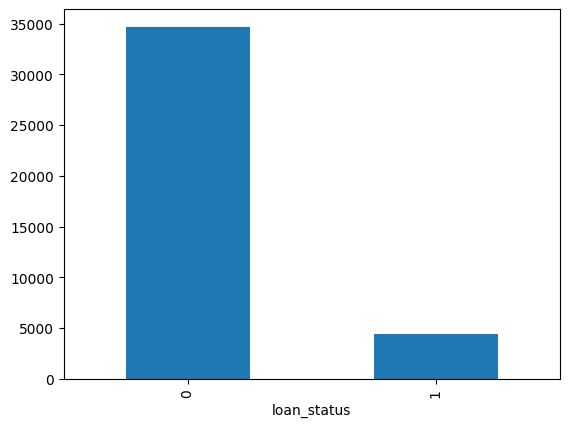

In [80]:
res["loan_status"].value_counts().plot(kind="bar")

In [81]:
res.to_csv("Results.csv", index=False)

In [82]:
import joblib

In [84]:
p = joblib.dump(pre, "pre.joblib")
p

['pre.joblib']

In [85]:
m = joblib.dump(best_model, "model.joblib")
m

['model.joblib']

In [86]:
joblib.load("pre.joblib")

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [87]:
joblib.load("model.joblib")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)